In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from text_models import TextClassifier, extract_text_blocks, tokenize_data
%load_ext autoreload
%autoreload 2

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Load Dataset 

In [3]:
df = pickle.load( open( "gdr_assignment_labelled.pkl", "rb" ))

# Train LSTM

In [4]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_lstm = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_lstm = model_lstm.train_LSTM(X_train, y_train)

W0205 05:19:56.340929 4525432256 deprecation.py:506] From /Users/kshitijsharma/Documents/CS231n/assignment2/.env/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 16s 3ms/sample - loss: 0.4569 - categorical_accuracy: 0.1262 - val_loss: 0.3888 - val_categorical_accuracy: 0.2015
Epoch 2/5
4824/4824 [==============================] - 15s 3ms/sample - loss: 0.3760 - categorical_accuracy: 0.3039 - val_loss: 0.3364 - val_categorical_accuracy: 0.4011
Epoch 3/5
4824/4824 [==============================] - 15s 3ms/sample - loss: 0.2714 - categorical_accuracy: 0.6194 - val_loss: 0.1881 - val_categorical_accuracy: 0.8302
Epoch 4/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.1408 - categorical_accuracy: 0.8566 - val_loss: 0.0930 - val_categorical_accuracy: 0.9160
Epoch 5/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.0725 - categorical_accuracy: 0.9179 - val_loss: 0.0665 - val_categorical_accuracy: 0.9142


In [5]:
test_loss, test_acc = model_lstm.evaluate(X_test,y_test, 'LSTM')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 2s 587us/sample - loss: 0.0768 - categorical_accuracy: 0.8958
Test Loss: 0.0767638432031328
Test Accuracy: 0.8958333134651184


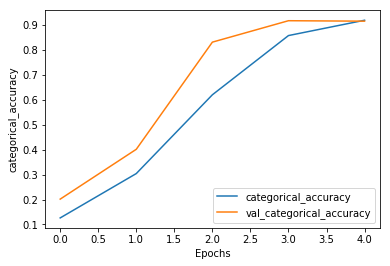

In [6]:
plot_graphs(history_lstm, 'categorical_accuracy')

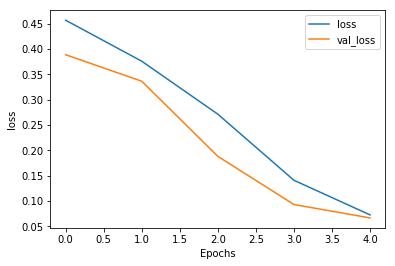

In [7]:
plot_graphs(history_lstm, 'loss')

# Train CNN

In [8]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_cnn = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn = model_cnn.train_CNN(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 401us/sample - loss: 0.4433 - categorical_accuracy: 0.2005 - val_loss: 0.3689 - val_categorical_accuracy: 0.5746
Epoch 2/5
4824/4824 [==============================] - 2s 345us/sample - loss: 0.2762 - categorical_accuracy: 0.7106 - val_loss: 0.1490 - val_categorical_accuracy: 0.8750
Epoch 3/5
4824/4824 [==============================] - 2s 350us/sample - loss: 0.0812 - categorical_accuracy: 0.9218 - val_loss: 0.0516 - val_categorical_accuracy: 0.9384
Epoch 4/5
4824/4824 [==============================] - 2s 346us/sample - loss: 0.0327 - categorical_accuracy: 0.9509 - val_loss: 0.0346 - val_categorical_accuracy: 0.9459
Epoch 5/5
4824/4824 [==============================] - 2s 358us/sample - loss: 0.0187 - categorical_accuracy: 0.9598 - val_loss: 0.0281 - val_categorical_accuracy: 0.9515


In [9]:
test_loss, test_acc = model_cnn.evaluate(X_test,y_test, 'CNN')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 81us/sample - loss: 0.0297 - categorical_accuracy: 0.9481
Test Loss: 0.02968990808409272
Test Accuracy: 0.948106050491333


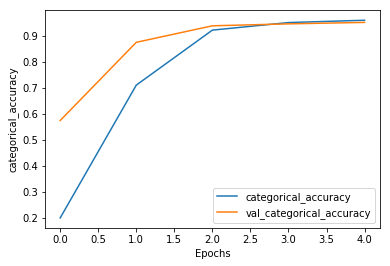

In [10]:
plot_graphs(history_cnn, 'categorical_accuracy')

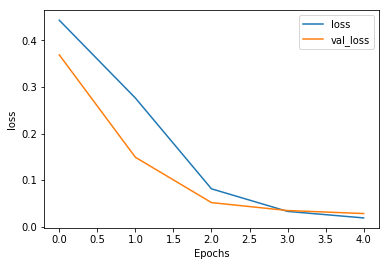

In [11]:
plot_graphs(history_cnn, 'loss')

# Train MLP

In [12]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_mlp = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_mlp = model_mlp.train_MLP(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 1s 121us/sample - loss: 3.3639 - categorical_accuracy: 0.1283 - val_loss: 1.1050 - val_categorical_accuracy: 0.1362
Epoch 2/5
4824/4824 [==============================] - 0s 44us/sample - loss: 1.1195 - categorical_accuracy: 0.1434 - val_loss: 0.8929 - val_categorical_accuracy: 0.1437
Epoch 3/5
4824/4824 [==============================] - 0s 42us/sample - loss: 0.8853 - categorical_accuracy: 0.1542 - val_loss: 0.7841 - val_categorical_accuracy: 0.1511
Epoch 4/5
4824/4824 [==============================] - 0s 42us/sample - loss: 0.7469 - categorical_accuracy: 0.1522 - val_loss: 0.6721 - val_categorical_accuracy: 0.1381
Epoch 5/5
4824/4824 [==============================] - 0s 41us/sample - loss: 0.6669 - categorical_accuracy: 0.1364 - val_loss: 0.6296 - val_categorical_accuracy: 0.1399


In [13]:
test_loss, test_acc = model_mlp.evaluate(X_test,y_test, 'MLP')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 27us/sample - loss: 0.6306 - categorical_accuracy: 0.1390
Test Loss: 0.6306454954725323
Test Accuracy: 0.13901515305042267


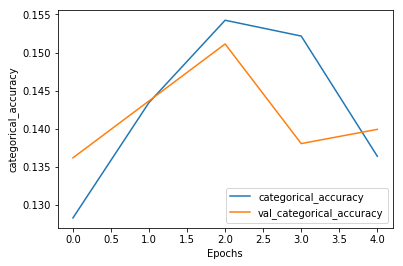

In [14]:
plot_graphs(history_mlp, 'categorical_accuracy')

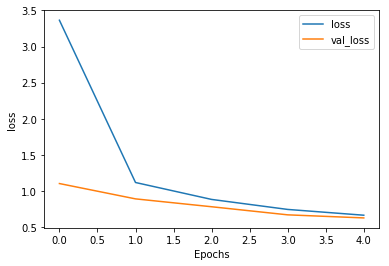

In [15]:
plot_graphs(history_mlp, 'loss')

In [16]:
def cross_validation(model_type, X_train, y_train, tokenizer, label_index):
    best_model = None
    learning_rates = np.linspace(1e-3, 5e-4, 1)
    regularization_strengths = np.linspace(0.001, 1.5, 1)

    best_val = -1.
    best_model = None

    for lr in learning_rates:
        for reg in regularization_strengths:
            # Train the network
            model = TextClassifier(tokenizer, label_index)
            history_mlp = model.train(X_train, y_train, model_type, learning_rate=lr, regularization=reg)
            history_mlp.history['categorical_accuracy']
            train_acc_history = history_mlp.history['categorical_accuracy']
            val_acc_history = history_mlp.history['val_categorical_accuracy']
            val_acc = val_acc_history[-1]

            if val_acc > best_val:
                best_val = val_acc
                best_model = model

            print('lr: %f, reg: %f, t_acc: %f, v_acc: %f.' % (lr, reg,  train_acc_history[-1], val_acc))

    print('Best Validation accuracy: ', best_val)
    return best_model

In [17]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_cnn = cross_validation("CNN", X_train, y_train, tokenizer, label_index)
best_mlp = cross_validation("MLP", X_train, y_train, tokenizer, label_index)
best_lstm = cross_validation("LSTM", X_train, y_train, tokenizer, label_index)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 461us/sample - loss: 0.4382 - categorical_accuracy: 0.1996 - val_loss: 0.3568 - val_categorical_accuracy: 0.4123
Epoch 2/5
4824/4824 [==============================] - 2s 430us/sample - loss: 0.2472 - categorical_accuracy: 0.7662 - val_loss: 0.1221 - val_categorical_accuracy: 0.9104
Epoch 3/5
4824/4824 [==============================] - 2s 408us/sample - loss: 0.0727 - categorical_accuracy: 0.9272 - val_loss: 0.0515 - val_categorical_accuracy: 0.9384
Epoch 4/5
4824/4824 [==============================] - 2s 373us/sample - loss: 0.0330 - categorical_accuracy: 0.9505 - val_loss: 0.0346 - val_categorical_accuracy: 0.9571
Epoch 5/5
4824/4824 [==============================] - 2s 419us/sample - loss: 0.0190 - categorical_accuracy: 0.9612 - val_loss: 0.0263 - val_categorical_accuracy: 0.9552
lr: 0.001000, reg: 0.001000, t_acc: 0.9612

In [18]:
test_loss, test_acc = best_cnn.evaluate(X_test,y_test, 'CNN')
print('CNN: Test Loss: {}'.format(test_loss))
print('CNN: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_lstm.evaluate(X_test,y_test, 'LSTM')
print('LSTM: Test Loss: {}'.format(test_loss))
print('LSTM: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_mlp.evaluate(X_test,y_test, 'MLP')
print('MLP: Test Loss: {}'.format(test_loss))
print('MLP: Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 84us/sample - loss: 0.0296 - categorical_accuracy: 0.9508
CNN: Test Loss: 0.029597338819594095
CNN: Test Accuracy: 0.9507575631141663
2640/2640 [==============================] - 2s 689us/sample - loss: 0.0790 - categorical_accuracy: 0.9064
LSTM: Test Loss: 0.07902625483093839
LSTM: Test Accuracy: 0.9064394235610962
2640/2640 [==============================] - 0s 38us/sample - loss: 0.4339 - categorical_accuracy: 0.1383
MLP: Test Loss: 0.4338834504286448
MLP: Test Accuracy: 0.13825757801532745


In [19]:
data_pros_cons = pickle.load( open( "gdr_assignment_pros_cons.pkl", "rb" ))
blocks = extract_text_blocks(data_pros_cons.iloc[10,0])

# Predict CNN

In [20]:
best_cnn.predict(blocks, model_name='CNN')

[(0.73557603,
  'Job Security/Advancement',
  'i worked for the internal marketing team (marcom) on the creative side'),
 (0.5190045,
  'culture_team',
  'the best thing about working at apple is your coworkers'),
 (0.7641754,
  'culture_team',
  'they do an excellent job of hiring incredibly intelligent'),
 (0.96287644, 'culture_team', 'talented people'),
 (0.5467394,
  'culture_team',
  "you'll always feel like the dumbest person in the room"),
 (0.8590689,
  'salary_benefits',
  'most of them are ego-free (about 70% of them) and will help you whenever possible'),
 (0.50157356, 'culture_team', 'if that is your kind of crew'),
 (0.59165627,
  'wlb_working_conditions',
  'you can often work from home or take comp days'),
 (0.8577918, 'salary_benefits', 'the compensation is good'),
 (0.9577415, 'salary_benefits', 'the stock program is okay'),
 (0.8977757, 'salary_benefits', 'bonus'),
 (0.9509722, 'culture_team', 'tim cook seems like a genuinely good person')]

# Predict LSTM

In [21]:
best_lstm.predict(blocks, model_name='LSTM')

[(0.9278065,
  'culture_team',
  'the best thing about working at apple is your coworkers'),
 (0.5888908,
  'culture_team',
  'they do an excellent job of hiring incredibly intelligent'),
 (0.84546137, 'culture_team', 'talented people'),
 (0.7021154,
  'Job Security/Advancement',
  "you'll always feel like the dumbest person in the room"),
 (0.85308367,
  'culture_team',
  'most of them are ego-free (about 70% of them) and will help you whenever possible'),
 (0.97871363,
  'wlb_working_conditions',
  'you can often work from home or take comp days'),
 (0.6856889, 'salary_benefits', 'the compensation is good'),
 (0.8196382, 'salary_benefits', 'the stock program is okay'),
 (0.9620663, 'culture_team', 'tim cook seems like a genuinely good person'),
 (0.7556362, 'culture_team', 'he feels like a real human being')]

# Predict MLP

In [22]:
best_mlp.predict(blocks, model_name='MLP')

[]